# Test of neural network on MNIST dataset
By: Magnus Kvåle Helliesen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neural_network.neural_network import NeuralNetwork

## Setting up a random neural network

In [2]:
# We set up a neural network with two hidden layers
nn = NeuralNetwork(784, 100, 1, 10)

## Importing MNIST dataset

I've gotten the data from [https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/](https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/).

In [3]:
# Importing data from csv
df = pd.read_csv('mnist_data/mnist_train.csv', sep=',', header=None)

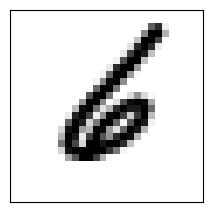

In [4]:
# Plotting some random number
plt.figure(figsize=(2.5, 2.5))
plt.imshow((255-df.loc[999, 1:]).to_numpy().reshape((28, 28)), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
# Storing the data as a list of tuples (slightly inefficient, but anyways)
data = []
for _, series in df.iterrows():
    array = series.loc[1:].to_numpy()
    array = (array-array.mean())/array.std()
    data += [array, 1*np.array([series.loc[0] == i for i in range(10)])],

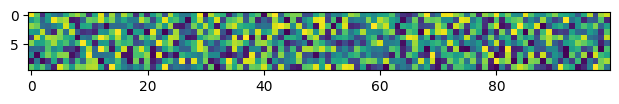

In [6]:
# Heatmap of weights between hidden layer before training
plt.figure(figsize=(7.5, 7.5))
plt.imshow(nn.weights0[1])
plt.show()

In [7]:
# Learning from random gradient descent
nn.train(data, 50000, 0.01)

/home/magnus/Python/neural-network/neural_network/neural_network.py:112: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/np.exp(x).sum()
/home/magnus/Python/neural-network/neural_network/neural_network.py:112: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x)/np.exp(x).sum()


KeyboardInterrupt: 

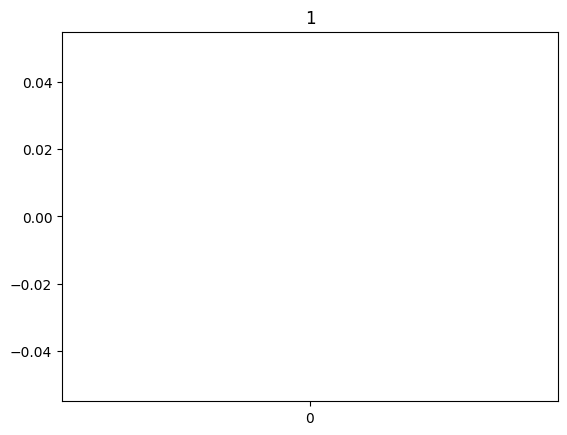

In [ ]:
plt.figure()
plt.bar(height=nn.predict(data[919][0]), x=[f'{i}' for i in range(10)], color='b')
plt.title(f'{sum(i*x for i, x in enumerate(data[919][1]))}')
plt.show()

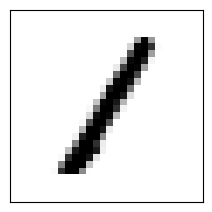

In [ ]:
# Plotting some random number
plt.figure(figsize=(2.5, 2.5))
plt.imshow((255-data[919][0]).reshape((28, 28)), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

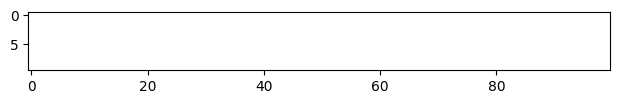

In [ ]:
# Heatmap of weights between hidden layer after training
plt.figure(figsize=(7.5, 7.5))
plt.imshow(nn.weights[1])
plt.show()

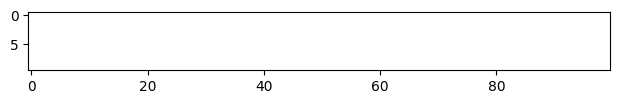

In [ ]:
# Heatmap of difference between weights between hidden layer before and after training
plt.figure(figsize=(7.5, 7.5))
plt.imshow(nn.delta_weights[1])
plt.show()